In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.22'

In [2]:
def filter_Ne_Line_neighbours(Corr_factor, number_av=6, offset=0.00005):
    Corr_factor_Filt=np.empty(len(Corr_factor), dtype=float)
    median_loop=np.empty(len(Corr_factor), dtype=float)

    for i in range(0, len(Corr_factor)): 
        if i<len(Corr_factor)/2: # For first half, do 5 after
            median_loop[i]=np.nanmedian(Corr_factor[i:i+number_av])
        if i>=len(Corr_factor)/2: # For first half, do 5 after
            median_loop[i]=np.nanmedian(Corr_factor[i-number_av:i])
        if Corr_factor[i]>(median_loop[i]+offset) or Corr_factor[i]<(median_loop[i]-offset) :
            Corr_factor_Filt[i]=np.nan
        else:
            Corr_factor_Filt[i]=Corr_factor[i]
    ds=pd.Series(Corr_factor_Filt)
    return ds
    

In [16]:
df2_1117_1447=pd.read_excel('1117_1447_72hr.xlsx')
df2_1220_1400=pd.read_excel('1200_1400_72hr.xlsx')
df2_1310_1567=pd.read_excel('1300_1567_72hr.xlsx')

## What should peak positions be

In [17]:
wavelength =532.046 # Specify the specific wavelength of your laser 
df_Ne=pf.calculate_Ne_line_positions(wavelength=wavelength, cut_off_intensity=100)
df_Ne.head()

,Raman_shift (cm-1),Intensity,Ne emission line in air
0,817.650482,1500.0,556.24416
1,818.699523,5000.0,556.27662
2,819.626623,750.0,556.30531
3,861.491169,350.0,557.60394
5,904.190330,500.0,558.93472


In [18]:
ideal_split_1117_1447=pf.calculate_Ne_splitting(wavelength=wavelength, 
                                      line1_shift=1117, line2_shift=1447,
                                     cut_off_intensity=1000)
ideal_split_1117_1447

,Ne_Split,Line_1,Line_2,Entered Pos Line 1,Entered Pos Line 2
0,330.477634,1117.086987,1447.564622,1117,1447


In [19]:
Corr_factor_1447=ideal_split_1117_1447['Line_2'].values/df2_1117_1447['pk2_peak_cent']
#Corr_factor_1447_Filt=Corr_factor_1447[(Corr_factor_1447>0.9994)&(Corr_factor_1447<0.99965)]

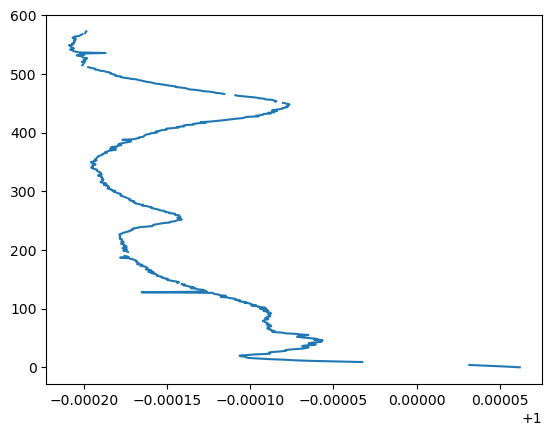

In [20]:
Corr_factor_1447_filt=filter_Ne_Line_neighbours(Corr_factor=Corr_factor_1447, 
                                                number_av=6, offset=0.00005)
plt.plot(Corr_factor_1447_filt, Corr_factor_1447_filt.index)

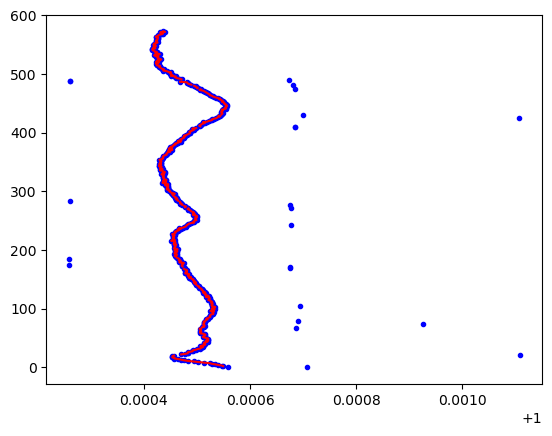

In [21]:
Corr_factor_1117=ideal_split_1117_1447['Line_1'].values/df2_1117_1447['pk1_peak_cent']

Corr_factor_1117_filt=filter_Ne_Line_neighbours(Corr_factor=Corr_factor_1117, 
                                                number_av=6, offset=0.00005)

plt.plot(Corr_factor_1117, Corr_factor_1117.index, '.b')
plt.plot(Corr_factor_1117_filt, Corr_factor_1117_filt.index, '-r')

In [22]:
ideal_split_1310_1567=pf.calculate_Ne_splitting(wavelength=wavelength, 
                                      line1_shift=1310, line2_shift=1567,
                                     cut_off_intensity=1000)
ideal_split_1310_1567

,Ne_Split,Line_1,Line_2,Entered Pos Line 1,Entered Pos Line 2
0,256.724773,1310.480205,1567.204978,1310,1567


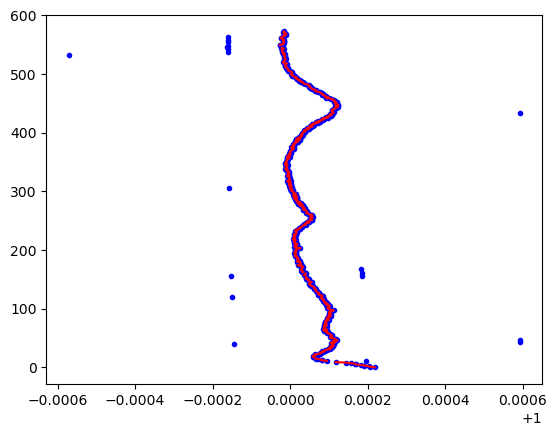

In [23]:
Corr_factor_1310=ideal_split_1310_1567['Line_1'].values/df2_1300_1567['pk1_peak_cent']

Corr_factor_1310_filt=filter_Ne_Line_neighbours(Corr_factor=Corr_factor_1310, 
                                                number_av=6, offset=0.00005)

plt.plot(Corr_factor_1310, Corr_factor_1310.index, '.b')
plt.plot(Corr_factor_1310_filt, Corr_factor_1310_filt.index, '-r')

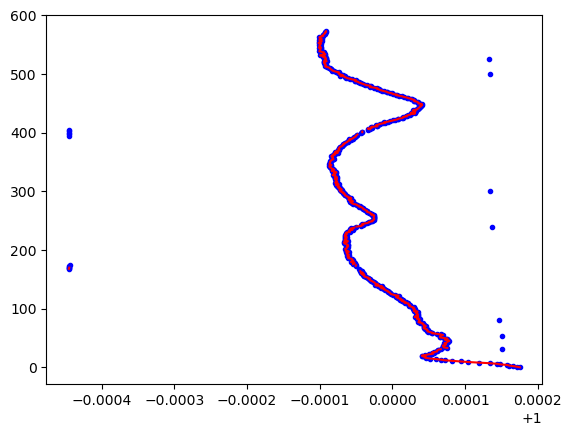

In [24]:
Corr_factor_1567=ideal_split_1310_1567['Line_2'].values/df2_1310_1567['pk2_peak_cent']

Corr_factor_1567_filt=filter_Ne_Line_neighbours(Corr_factor=Corr_factor_1567, 
                                                number_av=6, offset=0.00005)

plt.plot(Corr_factor_1567, Corr_factor_1567.index, '.b')
plt.plot(Corr_factor_1567_filt, Corr_factor_1567_filt.index, '-r')

## 1220-1400


In [25]:
ideal_split_1220_1400=pf.calculate_Ne_splitting(wavelength=wavelength, 
                                      line1_shift=1220, line2_shift=1400,
                                     cut_off_intensity=1000)
ideal_split_1220_1400

,Ne_Split,Line_1,Line_2,Entered Pos Line 1,Entered Pos Line 2
0,178.915133,1220.0,1398.915133,1220,1400


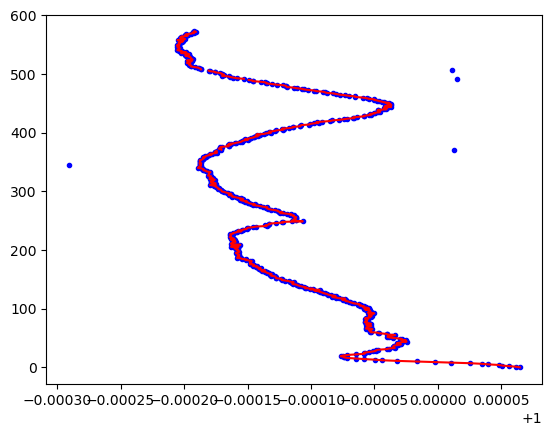

In [26]:
Corr_factor_1400=ideal_split_1220_1400['Line_2'].values/df2_1220_1400['pk2_peak_cent']

Corr_factor_1400_filt=filter_Ne_Line_neighbours(Corr_factor=Corr_factor_1400, 
                                                number_av=6, offset=0.00005)

plt.plot(Corr_factor_1400, Corr_factor_1400.index, '.b')
plt.plot(Corr_factor_1400_filt, Corr_factor_1400_filt.index, '-r')

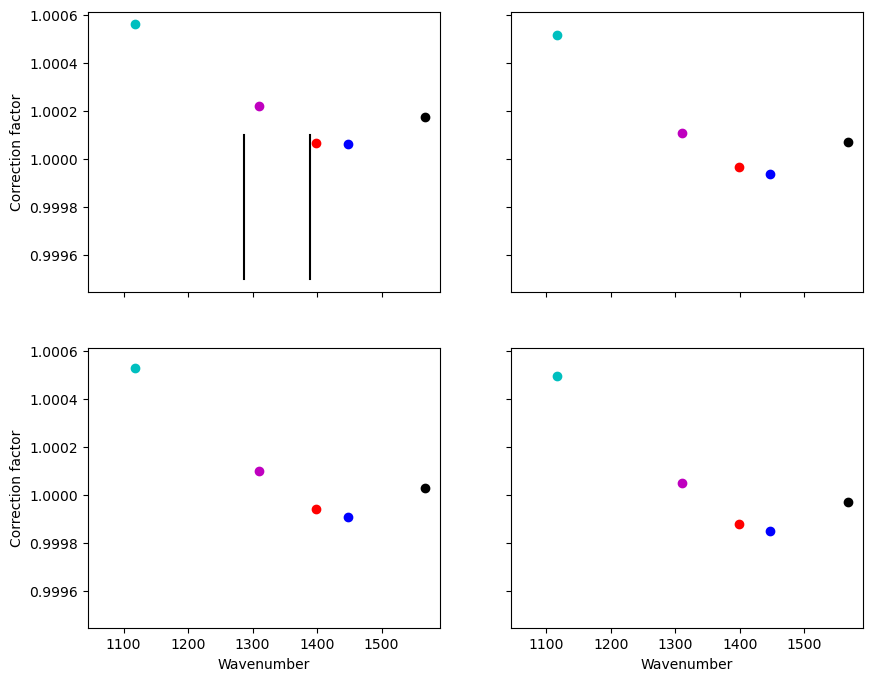

In [27]:
fig, ((ax0, ax1), (ax3, ax4)) = plt.subplots(2,2, figsize = (10,8), sharex=True, sharey=True) # adjust dimensions of figure 
i=0
ax0.plot(ideal_split_1220_1400['Line_2'], Corr_factor_1400_filt[i], 'or')
ax0.plot(ideal_split_1117_1447['Line_2'], Corr_factor_1447_filt[i], 'ob')
ax0.plot(ideal_split_1117_1447['Line_1'], Corr_factor_1117_filt[i], 'oc')
ax0.plot(ideal_split_1310_1567['Line_1'], Corr_factor_1310_filt[i], 'om')
ax0.plot(ideal_split_1310_1567['Line_2'], Corr_factor_1567_filt[i], 'ok')

i=50
ax1.plot(ideal_split_1220_1400['Line_2'], Corr_factor_1400_filt[i], 'or')
ax1.plot(ideal_split_1117_1447['Line_2'], Corr_factor_1447_filt[i], 'ob')
ax1.plot(ideal_split_1117_1447['Line_1'], Corr_factor_1117_filt[i], 'oc')
ax1.plot(ideal_split_1310_1567['Line_1'], Corr_factor_1310_filt[i], 'om')
ax1.plot(ideal_split_1310_1567['Line_2'], Corr_factor_1567_filt[i], 'ok')

i=100
ax3.plot(ideal_split_1220_1400['Line_2'], Corr_factor_1400_filt[i], 'or')
ax3.plot(ideal_split_1117_1447['Line_2'], Corr_factor_1447_filt[i], 'ob')
ax3.plot(ideal_split_1117_1447['Line_1'], Corr_factor_1117_filt[i], 'oc')
ax3.plot(ideal_split_1310_1567['Line_1'], Corr_factor_1310_filt[i], 'om')
ax3.plot(ideal_split_1310_1567['Line_2'], Corr_factor_1567_filt[i], 'ok')

i=150
ax4.plot(ideal_split_1220_1400['Line_2'], Corr_factor_1400_filt[i], 'or')
ax4.plot(ideal_split_1117_1447['Line_2'], Corr_factor_1447_filt[i], 'ob')
ax4.plot(ideal_split_1117_1447['Line_1'], Corr_factor_1117_filt[i], 'oc')
ax4.plot(ideal_split_1310_1567['Line_1'], Corr_factor_1310_filt[i], 'om')
ax4.plot(ideal_split_1310_1567['Line_2'], Corr_factor_1567_filt[i], 'ok')
ax3.set_xlabel('Wavenumber')
ax4.set_xlabel('Wavenumber')

ax3.set_ylabel('Correction factor')
ax0.set_ylabel('Correction factor')

ax0.ticklabel_format(useOffset=False)
ax1.ticklabel_format(useOffset=False)
ax3.ticklabel_format(useOffset=False)
ax4.ticklabel_format(useOffset=False)
ax1.set_xlim([1045, 1591])

ax0.plot([1287, 1287], [0.9995, 1.0001], '-k')
ax0.plot([1389, 1389], [0.9995, 1.0001], '-k')

In [28]:
corr_c=pd.DataFrame(data={'1117_Corr': Corr_factor_1117_filt,
                              '1117_peak':ideal_split_1117_1447['Line_1'],
                              '1310_Corr': Corr_factor_1310_filt,
                              '1310_peak': ideal_split_1310_1567['Line_1'],
                            '1400_Corr': Corr_factor_1400_filt,
                              '1400_peak': ideal_split_1220_1400['Line_2'],
                              '1447_Corr': Corr_factor_1447_filt,
                          '1447_peak': ideal_split_1117_1447['Line_2'],
                              '1567_Corr': Corr_factor_1567_filt,
                             '1567_peak': ideal_split_1310_1567['Line_2']})


In [77]:
corr_factor=pd.DataFrame(data={'1117_Corr': Corr_factor_1117_filt,
                              
                              '1310_Corr': Corr_factor_1310_filt,
                              
                            '1400_Corr': Corr_factor_1400_filt,
                             
                              '1447_Corr': Corr_factor_1447_filt,
                                 '1567_Corr': Corr_factor_1567_filt})
sumro=corr_factor.sum(axis=1)
#corr_factor_Filt=corr_factor[(sumro>3.9) & (sumro<4.1)]
corr_factor_Filt=corr_factor[(sumro>4.9) & (sumro<5.1)]
                           
                             # '1567_peak': ideal_split_1310_1567['Line_2']})


In [78]:
sumro

0      5.001079
1      4.000494
2      5.001022
3      5.000989
4      5.000960
         ...   
569    4.000138
570    4.999937
571    4.999928
572    4.999942
573    4.999939
Length: 574, dtype: float64

In [79]:
corr_peaks=pd.DataFrame(data={
                              '1117_peak':ideal_split_1117_1447['Line_1'],
                              '1310_peak': ideal_split_1310_1567['Line_1'],   
                              '1400_peak': ideal_split_1220_1400['Line_2'],
                             '1447_peak': ideal_split_1117_1447['Line_2'],
                             '1567_peak': ideal_split_1310_1567['Line_2']})


In [80]:
corr_peaks.head()

,1117_peak,1310_peak,1400_peak,1447_peak,1567_peak
0,1117.086987,1310.480205,1398.915133,1447.564622,1567.204978


In [81]:
corr_peaks

,1117_peak,1310_peak,1400_peak,1447_peak,1567_peak
0,1117.086987,1310.480205,1398.915133,1447.564622,1567.204978


Text(0, 0.5, 'Correction factor')

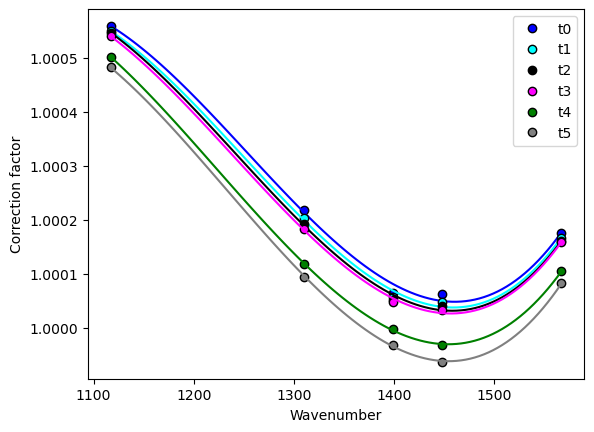

In [85]:
color=['red', 'blue', 'cyan', 'black', 'magenta', 'green', 'grey']
n=0
for i in [0, 1, 2, 3, 4, 5]:
    n=n+1
    text='t'+str(i)
    x=np.array(corr_peaks.iloc[0].values)
    y=corr_factor_Filt.iloc[i].values
    Pf=np.poly1d(np.polyfit(x, y,
                              3))
    Px = np.linspace(1117, 1567, 100)
    Py = Pf(Px)
    plt.plot(x, y, 'ok', mfc=color[n], label=text)
    plt.plot(Px, Py, '-', color=color[n])
    plt.legend()
    
plt.ticklabel_format(useOffset=False)

plt.xlabel('Wavenumber')
plt.ylabel('Correction factor')


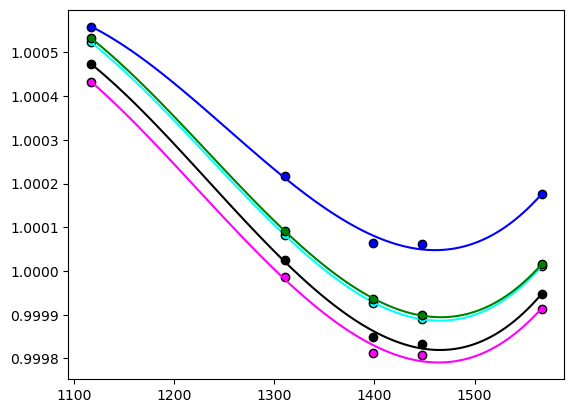

In [87]:
color=['red', 'blue', 'cyan', 'black', 'magenta', 'green']
n=0
for i in [0, 100, 200, 300, 400]:
    n=n+1
    x=np.array(corr_peaks.iloc[0].values)
    y=corr_factor_Filt.iloc[i].values
    Pf=np.poly1d(np.polyfit(x, y,
                              3))
    Px = np.linspace(1117, 1567, 100)
    Py = Pf(Px)
    plt.plot(x, y, 'ok', mfc=color[n])
    plt.plot(Px, Py, '-', color=color[n])
    
plt.ticklabel_format(useOffset=False)

In [88]:
y_test=Pf[2]*(1150**2)+Pf[1]*1150+Pf[0]
y_test

0.9777420403799022

In [89]:
corr_peaks

,1117_peak,1310_peak,1400_peak,1447_peak,1567_peak
0,1117.086987,1310.480205,1398.915133,1447.564622,1567.204978


In [90]:
Pf(1150)

1.000466895615997

In [39]:
len(corr_peaks)

1

## Trying to loop through this for a single diad position

Text(0, 0.5, 'Correction factor')

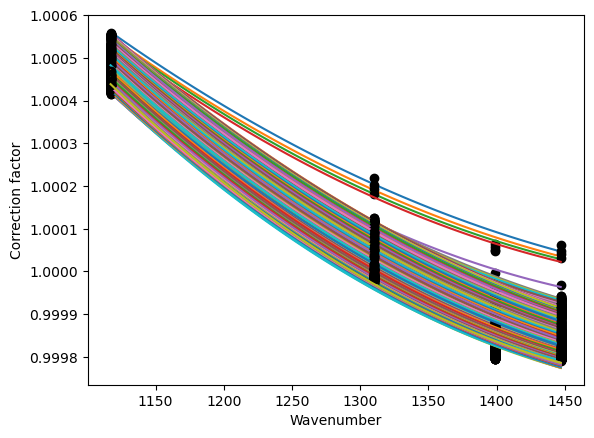

In [40]:

x2_coeff=np.empty(len(corr_factor_Filt), dtype=float)
x_coeff=np.empty(len(corr_factor_Filt), dtype=float)
const_coeff=np.empty(len(corr_factor_Filt), dtype=float)
for i in range(0, len(corr_factor_Filt)):
    n=n+1
    text='t'+str(i)
    x=np.array(corr_peaks.iloc[0].values)
    y=corr_factor_Filt.iloc[i].values
    Pf=np.poly1d(np.polyfit(x, y,
                              2))
    x2_coeff[i]=Pf[2]
    x_coeff[i]=Pf[1]
    const_coeff[i]=Pf[0]
    Px = np.linspace(1117, 1447, 100)
    Py = Pf(Px)

    plt.plot(x, y, 'ok', label=text)
    plt.plot(Px, Py, '-')
    #plt.legend()
    
plt.ticklabel_format(useOffset=False)

plt.xlabel('Wavenumber')
plt.ylabel('Correction factor')


In [57]:
x_diad2=1390
x_diad1=1286
split_test=x_diad2-x_diad1
Py_diad2=x2_coeff*x_diad2**2 + x_coeff*x_diad2 + const_coeff
Py_diad1=x2_coeff*x_diad1**2 + x_coeff*x_diad1 + const_coeff

x_diad2_r=1389.1
x_diad1_r=1286
split_test_r=x_diad2_r-x_diad1_r

Py_diad2_r=x2_coeff*x_diad2_r**2 + x_coeff*x_diad2_r + const_coeff
Py_diad1_r=x2_coeff*x_diad1_r**2 + x_coeff*x_diad1_r + const_coeff

In [58]:
split_test_r

103.09999999999991

In [50]:
df2_1117_1447_Filt=filter_Ne_Line_neighbours(Corr_factor=df2_1117_1447['Ne_Corr'], number_av=6, offset=0.00005)
df2_1117_1447_Filt


0      0.998387
1           NaN
2      0.998357
3      0.998332
4      0.998317
         ...   
569         NaN
570    0.997660
571    0.997679
572    0.997648
573    0.997662
Length: 574, dtype: float64

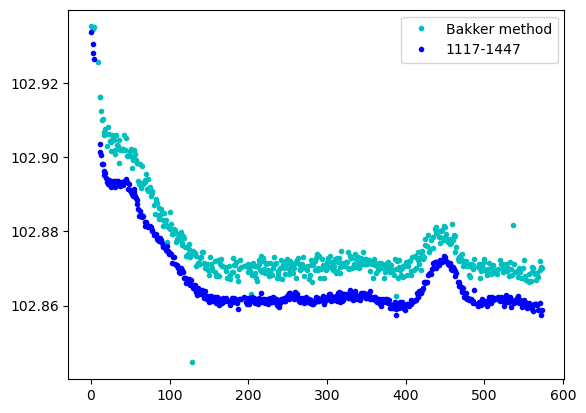

In [63]:
plt.plot(corr_factor_Filt.index, Py_diad2_r*x_diad2_r-Py_diad1_r*x_diad1_r, '.c', label='Bakker method')
plt.plot(df2_1117_1447_Filt.index, df2_1117_1447_Filt*split_test_r, '.b', label='1117-1447')
plt.legend()

In [66]:
split_test

104

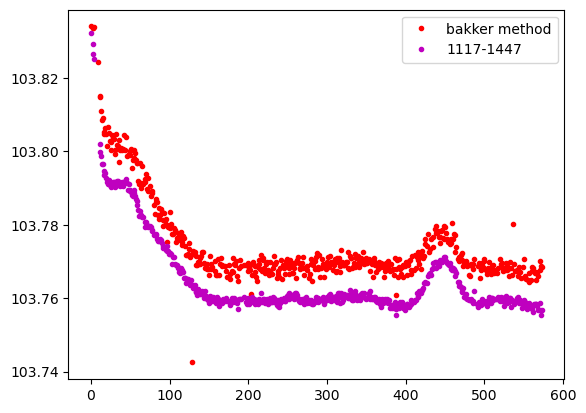

In [67]:
plt.plot(corr_factor_Filt.index, Py_diad2*x_diad2-Py_diad1*x_diad1, '.r', label='bakker method')

plt.ticklabel_format(useOffset=False)

plt.plot(df2_1117_1447_Filt.index, df2_1117_1447_Filt*split_test, '.m', label='1117-1447')
plt.legend()

In [99]:
ax0.plot(ideal_split_1220_1400['Line_2'], Corr_factor_1400_filt[i], 'or')
ax0.plot(ideal_split_1117_1447['Line_2'], Corr_factor_1447_filt[i], 'ob')
ax0.plot(ideal_split_1117_1447['Line_1'], Corr_factor_1117_filt[i], 'oc')
ax0.plot(ideal_split_1310_1567['Line_1'], Corr_factor_1310_filt[i], 'om')
ax0.plot(ideal_split_1310_1567['Line_2'], Corr_factor_1567_filt[i], 'ok')

,1117_Corr,1310_Corr,1400_Corr,1447_Corr,1567_Corr
0,0.999442,0.999782,0.999936,0.999938,0.999825
1,NaN,0.999795,0.999938,0.999944,0.999829
2,0.999451,0.999798,0.999944,0.999952,0.999834
3,0.999454,0.999808,0.999950,0.999960,0.999840
4,0.999460,0.999818,0.999952,0.999968,0.999842
...,...,...,...,...,...
569,0.999565,1.000010,1.000195,NaN,1.000093
570,0.999564,1.000015,1.000192,1.000199,1.000093
571,0.999570,1.000017,1.000193,1.000199,1.000093
572,0.999560,1.000017,1.000191,1.000199,1.000091
